In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n=1
dl=np.around(0.01/n,decimals=5)
x0=0.4
y0=0.4
nx=int(np.rint(1+x0/(dl)))
ny=int(np.rint(1+y0/(dl)))
x=np.linspace(0,x0,nx)
y=np.linspace(0,y0,ny)
xx,yy=np.meshgrid(x,y)
xx=np.around(xx,decimals=5)
yy=np.around(yy,decimals=5)
Mx=np.array([xx,yy])
lpx=0.12
lpy=0.12
lcen=0.18
l0x=lcen
l0y=lcen
l1x=lcen+lpx
l1y=lcen+lpy
xe1=np.around(x0-dl,decimals=5)
ye1=np.around(y0-dl,decimals=5)

## Solucion Generacion

In [4]:
VsolG=np.zeros(nx*ny)
matG=np.zeros((nx*ny,nx*ny))
geG=np.zeros((ny,nx))
geG[0,:]=1
geG[ny-1,:]=2
geG[:,0]=3
geG[:,nx-1]=4
geG[(xx>0.05)&(xx<0.15)&(yy>0.05)&(yy<0.15)]=5
geG[0,0]=6
geG[ny-1,0]=7
geG[0,nx-1]=8
geG[ny-1,nx-1]=9
geG[(xx>=l0x)&(xx<=l1x)&(yy>=l0y)&(yy<=l1y)]=10
geG[(xx>=0.05)&(xx<=0.15)&(yy==0.05)]=11
geG[(xx>=0.05)&(xx<=0.15)&(yy==0.15)]=12
geG[(yy>=0.05)&(yy<=0.15)&(xx==0.05)]=13
geG[(yy>=0.05)&(yy<=0.15)&(xx==0.15)]=14

for i in range(nx):
    for j in range(ny):
        ind=j*nx+i
        if(geG[j,i]==0):
            matG[ind,ind]=-4
            matG[ind,ind-1]=matG[ind,ind+1]=matG[ind,ind+nx]=matG[ind,ind-nx]=1
        elif(geG[j,i]==1):
            matG[ind,ind]=-4
            matG[ind,ind-1]=matG[ind,ind+1]=1
            matG[ind,ind+nx]=2
        elif(geG[j,i]==2):
            matG[ind,ind]=1
        elif(geG[j,i]==3):
            matG[ind,ind]=-4
            matG[ind,ind-nx]=matG[ind,ind+nx]=1
            matG[ind,ind+1]=2
        elif(geG[j,i]==4):
            matG[ind,ind]=1
        elif(geG[j,i]==5):
            matG[ind,ind]=1
            VsolG[ind]=0
        elif(geG[j,i]==6):
            matG[ind,ind]=-2
            matG[ind,ind+1]=matG[ind,ind+nx]=1
        elif(geG[j,i]==7):
            matG[ind,ind]=-2
            matG[ind,ind+1]=matG[ind,ind-nx]=1
        elif(geG[j,i]==8):
            matG[ind,ind]=-2
            matG[ind,ind-1]=matG[ind,ind+nx]=1
        elif(geG[j,i]==9):
            matG[ind,ind]=1
        elif(geG[j,i]==10):
            matG[ind,ind]=1
        elif(geG[j,i]==11):
            matG[ind,ind]=-4
            matG[ind,ind-1]=matG[ind,ind+1]=1
            matG[ind,ind-nx]=2
            VsolG[ind]=-1
        elif(geG[j,i]==12):
            matG[ind,ind]=-4
            matG[ind,ind-1]=matG[ind,ind+1]=1
            matG[ind,ind+nx]=2
            VsolG[ind]=-1
        elif(geG[j,i]==13):
            matG[ind,ind]=-4
            matG[ind,ind-nx]=matG[ind,ind+nx]=1
            matG[ind,ind-1]=2
            VsolG[ind]=-1
        elif(geG[j,i]==14):
            matG[ind,ind]=-4
            matG[ind,ind-nx]=matG[ind,ind+nx]=1
            matG[ind,ind+1]=2
            VsolG[ind]=-1
            
TG=np.linalg.solve(matG,VsolG)
TmG = TG.reshape((ny, nx))
print(np.min(TmG),np.max(TmG))

0.0 16.483041341118057


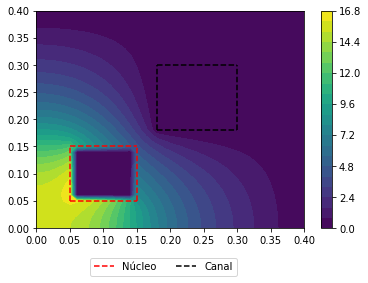

In [5]:
plt.contourf(xx, yy, TmG, 20)
plt.plot([0.05,0.15],[0.05,0.05],"--",c="r")
plt.plot([0.05,0.15],[0.15,0.15],"--",c="r")
plt.plot([0.05,0.05],[0.05,0.15],"--",c="r")
plt.plot([0.15,0.15],[0.05,0.15],"--",c="r",label="Núcleo")
plt.plot([l0x,l0x],[l0y,l1y],"--",c="k")
plt.plot([l0x,l1x],[l0y,l0y],"--",c="k")
plt.plot([l0x,l1x],[l1y,l1y],"--",c="k")
plt.plot([l1x,l1x],[l0y,l1y],"--",c="k",label="Canal")
plt.legend(loc=(0.2,-0.22),ncol=2)

plt.colorbar();

## Solucion Refrigeracion

In [6]:
VsolR=np.zeros(nx*ny)
matR=np.zeros((nx*ny,nx*ny))
geR=np.zeros((ny,nx))
geR[0,:]=1
geR[ny-1,:]=2
geR[:,0]=3
geR[:,nx-1]=4
geR[(xx>=0.05)&(xx<=0.15)&(yy>=0.05)&(yy<=0.15)]=5
geR[0,0]=6
geR[ny-1,0]=7
geR[0,nx-1]=8
geR[ny-1,nx-1]=9
geR[(xx>=l0x)&(xx<=l1x)&(yy>=l0y)&(yy<=l1y)]=10
geR[(xx>=l0x)&(xx<=l1x)&(yy>=l0y)&(yy<=l1y)]=10
geR[(xx>=0.05)&(xx<=0.15)&(yy==0.05)]=11
geR[(xx>=0.05)&(xx<=0.15)&(yy==0.15)]=12
geR[(yy>=0.05)&(yy<=0.15)&(xx==0.05)]=13
geR[(yy>=0.05)&(yy<=0.15)&(xx==0.15)]=14

for i in range(nx):
    for j in range(ny):
        ind=j*nx+i
        if(geR[j,i]==0):
            matR[ind,ind]=-4
            matR[ind,ind-1]=matR[ind,ind+1]=matR[ind,ind+nx]=matR[ind,ind-nx]=1
        elif(geR[j,i]==1):
            matR[ind,ind]=-4
            matR[ind,ind-1]=matR[ind,ind+1]=1
            matR[ind,ind+nx]=2
        elif(geR[j,i]==2):
            matR[ind,ind]=1
        elif(geR[j,i]==3):
            matR[ind,ind]=-4
            matR[ind,ind-nx]=matR[ind,ind+nx]=1
            matR[ind,ind+1]=2
        elif(geR[j,i]==4):
            matR[ind,ind]=1
        elif(geR[j,i]==5):
            matR[ind,ind]=1
            VsolR[ind]=0
        elif(geR[j,i]==6):
            matR[ind,ind]=-2
            matR[ind,ind+1]=matR[ind,ind+nx]=1
        elif(geR[j,i]==7):
            matR[ind,ind]=-2
            matR[ind,ind+1]=matR[ind,ind-nx]=1
        elif(geR[j,i]==8):
            matR[ind,ind]=-2
            matR[ind,ind-1]=matR[ind,ind+nx]=1
        elif(geR[j,i]==9):
            matR[ind,ind]=-2
            matR[ind,ind-1]=matR[ind,ind-nx]=1
        elif(geR[j,i]==10):
            matR[ind,ind]=1
            VsolR[ind]=1 
        elif(geR[j,i]==11):
            matR[ind,ind]=-4
            matR[ind,ind-1]=matR[ind,ind+1]=1
            matR[ind,ind-nx]=2
        elif(geR[j,i]==12):
            matR[ind,ind]=-4
            matR[ind,ind-1]=matR[ind,ind+1]=1
            matR[ind,ind+nx]=2
        elif(geR[j,i]==13):
            matR[ind,ind]=-4
            matR[ind,ind-nx]=matR[ind,ind+nx]=1
            matR[ind,ind-1]=2
        elif(geR[j,i]==14):
            matR[ind,ind]=-4
            matR[ind,ind-nx]=matR[ind,ind+nx]=1
            matR[ind,ind+1]=2
            
TR=np.linalg.solve(matR,VsolR)
TmR = TR.reshape((ny, nx))
print(np.min(TmR),np.max(TmR))

0.0 1.0000000000000002


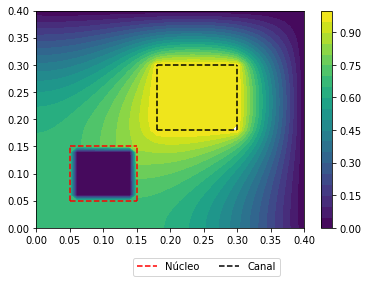

In [7]:
plt.contourf(xx, yy, TmR, 20)
plt.plot([0.05,0.15],[0.05,0.05],"--",c="r")
plt.plot([0.05,0.15],[0.15,0.15],"--",c="r")
plt.plot([0.05,0.05],[0.05,0.15],"--",c="r")
plt.plot([0.15,0.15],[0.05,0.15],"--",c="r",label="Núcleo")
plt.plot([l0x,l0x],[l0y,l1y],"--",c="k")
plt.plot([l0x,l1x],[l0y,l0y],"--",c="k")
plt.plot([l0x,l1x],[l1y,l1y],"--",c="k")
plt.plot([l1x,l1x],[l0y,l1y],"--",c="k",label="Canal")
plt.legend(loc=(0.36,-0.22),ncol=2)
plt.colorbar();

## Solucion Paredes Externas

In [8]:
VsolE=np.zeros(nx*ny)
matE=np.zeros((nx*ny,nx*ny))
geE=np.zeros((ny,nx))
geE[0,:]=1
geE[ny-1,:]=2
geE[:,0]=3
geE[:,nx-1]=4
geE[(xx>=0.05)&(xx<=0.15)&(yy>=0.05)&(yy<=0.15)]=5
geE[0,0]=6
geE[ny-1,0]=7
geE[0,nx-1]=8
geE[ny-1,nx-1]=9
geE[(xx>=l0x)&(xx<=l1x)&(yy>=l0y)&(yy<=l1y)]=10
geE[(xx>=0.05)&(xx<=0.15)&(yy==0.05)]=11
geE[(xx>=0.05)&(xx<=0.15)&(yy==0.15)]=12
geE[(yy>=0.05)&(yy<=0.15)&(xx==0.05)]=13
geE[(yy>=0.05)&(yy<=0.15)&(xx==0.15)]=14

for i in range(nx):
    for j in range(ny):
        ind=j*nx+i
        if(geE[j,i]==0):
            matE[ind,ind]=-4
            matE[ind,ind-1]=matE[ind,ind+1]=matE[ind,ind+nx]=matE[ind,ind-nx]=1
        elif(geE[j,i]==1):
            matE[ind,ind]=-4
            matE[ind,ind-1]=matE[ind,ind+1]=1
            matE[ind,ind+nx]=2
        elif(geE[j,i]==2):
            matE[ind,ind]=1
            VsolE[ind]=1
        elif(geE[j,i]==3):
            matE[ind,ind]=-4
            matE[ind,ind-nx]=matE[ind,ind+nx]=1
            matE[ind,ind+1]=2
        elif(geE[j,i]==4):
            matE[ind,ind]=1
            VsolE[ind]=1        
        elif(geE[j,i]==5):
            matE[ind,ind]=1
            VsolE[ind]=0
        elif(geE[j,i]==6):
            matE[ind,ind]=-2
            matE[ind,ind+1]=matE[ind,ind+nx]=1
        elif(geE[j,i]==7):
            matE[ind,ind]=1
            VsolE[ind]=1
        elif(geE[j,i]==8):
            matE[ind,ind]=1
            VsolE[ind]=1
        elif(geE[j,i]==9):
            matE[ind,ind]=1
            VsolE[ind]=1
        elif(geE[j,i]==10):
            matE[ind,ind]=1
        elif(geE[j,i]==11):
            matE[ind,ind]=-4
            matE[ind,ind-1]=matE[ind,ind+1]=1
            matE[ind,ind-nx]=2
        elif(geE[j,i]==12):
            matE[ind,ind]=-4
            matE[ind,ind-1]=matE[ind,ind+1]=1
            matE[ind,ind+nx]=2
        elif(geE[j,i]==13):
            matE[ind,ind]=-4
            matE[ind,ind-nx]=matE[ind,ind+nx]=1
            matE[ind,ind-1]=2
        elif(geE[j,i]==14):
            matE[ind,ind]=-4
            matE[ind,ind-nx]=matE[ind,ind+nx]=1
            matE[ind,ind+1]=2
            
TE=np.linalg.solve(matE,VsolE)
TmE = TE.reshape((ny, nx))
TmE[(xx>=l0x)&(xx<=l1x)&(yy>=l0y)&(yy<=l1y)]=0
print(np.min(TmE),np.max(TmE))

0.0 1.0


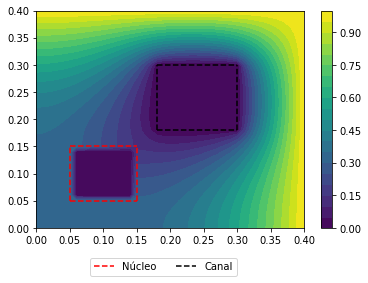

In [9]:
plt.contourf(xx, yy, TmE, 20)
plt.plot([0.05,0.15],[0.05,0.05],"--",c="r")
plt.plot([0.05,0.15],[0.15,0.15],"--",c="r")
plt.plot([0.05,0.05],[0.05,0.15],"--",c="r")
plt.plot([0.15,0.15],[0.05,0.15],"--",c="r",label="Núcleo")
plt.plot([l0x,l0x],[l0y,l1y],"--",c="k")
plt.plot([l0x,l1x],[l0y,l0y],"--",c="k")
plt.plot([l0x,l1x],[l1y,l1y],"--",c="k")
plt.plot([l1x,l1x],[l0y,l1y],"--",c="k",label="Canal")
plt.legend(loc=(0.2,-0.22),ncol=2)
plt.colorbar();

## Solucion Problema

In [38]:
k=100

In [155]:
keg=(-np.mean(TmG[(yy==y0)]-TmG[(yy==ye1)])-np.mean(TmG[(yy==x0)]-TmG[(yy==xe1)]))*k

krg=(-np.mean(TmG[(xx>=l0x)&(xx<=l1x)&(yy==l0y)]-TmG[(xx>=l0x)&(xx<=l1x)&(yy==np.around(l0y-dl))])-np.mean(TmG[(xx>=l0x)&(xx<=l1x)&(yy==l1y)]-TmG[(xx>=l1x)&(xx<=l1x)&(yy==np.around(l1y+dl,decimals=5))])-np.mean(TmG[(yy>=l0y)&(yy<=l1y)&(xx==l0x)]-TmG[(yy>=l0y)&(yy<=l1y)&(xx==np.around(l0x-dl,decimals=5))])-np.mean(TmG[(yy>=l0y)&(yy<=l1y)&(xx==l1x)]-TmG[(yy>=l0y)&(yy<=l1y)&(xx==np.around(l1x+dl,decimals=5))]))*k

In [156]:
ker=(-np.mean(TmR[(yy==y0)]-TmR[(yy==ye1)])-np.mean(TmR[(yy==x0)]-TmR[(yy==xe1)]))*k

krr=(-np.mean(TmR[(xx>=l0x)&(xx<=l1x)&(yy==l0y)]-TmR[(xx>=l0x)&(xx<=l1x)&(yy==np.around(l0y-dl,decimals=5))])-np.mean(TmR[(xx>=l0x)&(xx<=l1x)&(yy==l1y)]-TmR[(xx>=l1x)&(xx<=l1x)&(yy==np.around(l1y+dl,decimals=5))])-np.mean(TmR[(yy>=l0y)&(yy<=l1y)&(xx==l0x)]-TmR[(yy>=l0y)&(yy<=l1y)&(xx==np.around(l0x-dl,decimals=5))])-np.mean(TmR[(yy>=l0y)&(yy<=l1y)&(xx==l1x)]-TmR[(yy>=l0y)&(yy<=l1y)&(xx==np.around(l1x+dl,decimals=5))]))*k

In [157]:
kee=(-np.mean(TmE[(yy==y0)]-TmE[(yy==ye1)])-np.mean(TmE[(yy==x0)]-TmE[(yy==xe1)]))*k

kre=(-np.mean(TmE[(xx>=l0x)&(xx<=l1x)&(yy==l0y)]-TmE[(xx>=l0x)&(xx<=l1x)&(yy==np.around(l0y-dl,decimals=5))])-np.mean(TmE[(xx>=l0x)&(xx<=l1x)&(yy==l1y)]-TmE[(xx>=l1x)&(xx<=l1x)&(yy==np.around(l1y+dl,decimals=5))])-np.mean(TmE[(yy>=l0y)&(yy<=l1y)&(xx==l0x)]-TmE[(yy>=l0y)&(yy<=l1y)&(xx==np.around(l0x-dl,decimals=5))])-np.mean(TmE[(yy>=l0y)&(yy<=l1y)&(xx==l1x)]-TmE[(yy>=l0y)&(yy<=l1y)&(xx==np.around(l1x+dl,decimals=5))]))*k

In [158]:
print(keg)
print(krg)
print(ker)
print(krr)
print(kee)
print(kre)

15.710598856571046
502.08306783366316
12.174919682912584
-44.384323363639844
-12.220260829026564
44.3931493401584


In [173]:
pr=2*(lpx+lpy)
rho=997
cp=4179.6
Q=0.00001             #revisar
Qg=50000*2*dl/k             #revisar

pe=0.8
Tinf=25
T0=40

In [174]:
#he:
ve=10
Pre=0.707
nu=18.37*np.power(0.1,6)
Ree=ve*x0/nu
ke=0.0263
he=0.332*np.power(Ree,1/2)*np.power(Pre,1/3)*ke/x0
he

9.074354252865609

In [175]:
#hr:
kr=0.630
hr=3.61*kr*pr/(4*lpx*lpy)
hr

18.952499999999997

In [176]:
ca1=hr*pr/(rho*cp*Q)
ca2=(hr*pr-krr-(kre*ker/(he*pe-kee)))
c1=(ca1/ca2)*(krg*Qg+kre*(keg*Qg+he*pe*Tinf)/(he*pe-kee))
c2=ca1*((hr*pr/ca2)-1)

In [177]:
print(c1)
print(c2)

49.136756101169105
-0.14114170067885576


In [178]:
Q/(dl*dl)

0.1

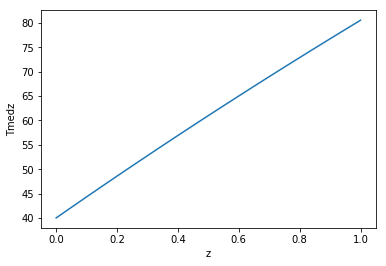

In [179]:
from scipy.integrate import odeint

# function that returns dy/dt
def model(T,z):
    dTdz = c1+c2*T
    return dTdz

z = np.linspace(0,1,num=101, endpoint=True)

Tmedz = odeint(model,T0,z)

# plot results
plt.plot(z,Tmedz)
plt.xlabel('z')
plt.ylabel('Tmedz')
plt.show()

In [180]:
Trz=(krg*Qg+hr*pr*Tmedz+kre*((keg*Qg+he*pe*Tinf)/(he*pe-kee)))/(hr*pr-krr-(kre*ker/(he*pe-kee)))

In [181]:
Tez=(keg*Qg+he*pe*Tinf+ker*Trz)/(he*pe-kee)

In [182]:
Qgz=Qg    #revisar

In [188]:
Tfin=np.zeros((np.size(z),ny,nx))
Tmax=np.zeros(np.size(z))

In [189]:
for i in range((np.size(z))):
    Tfin[i,:,:]=Qgz*TmG+Trz[i]*TmR+Tez[i]*TmE
    Tmax[i]=np.max(Tfin[i,:,:])

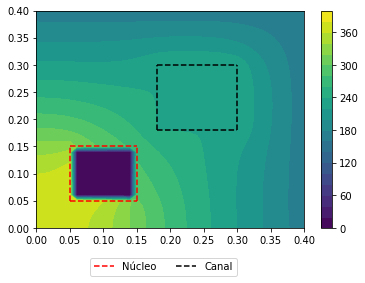

In [190]:
plt.contourf(xx, yy, Tfin[0,:,:], 20)
plt.plot([0.05,0.15],[0.05,0.05],"--",c="r")
plt.plot([0.05,0.15],[0.15,0.15],"--",c="r")
plt.plot([0.05,0.05],[0.05,0.15],"--",c="r")
plt.plot([0.15,0.15],[0.05,0.15],"--",c="r",label="Núcleo")
plt.plot([l0x,l0x],[l0y,l1y],"--",c="k")
plt.plot([l0x,l1x],[l0y,l0y],"--",c="k")
plt.plot([l0x,l1x],[l1y,l1y],"--",c="k")
plt.plot([l1x,l1x],[l0y,l1y],"--",c="k",label="Canal")
plt.legend(loc=(0.2,-0.22),ncol=2)
plt.colorbar();

In [191]:
Tmedz

array([[40.        ],
       [40.43460422],
       [40.86859546],
       [41.30197453],
       [41.7347424 ],
       [42.1668996 ],
       [42.59844715],
       [43.02938599],
       [43.45971709],
       [43.88944142],
       [44.31855977],
       [44.74707288],
       [45.1749816 ],
       [45.60228678],
       [46.0289893 ],
       [46.45508998],
       [46.88058969],
       [47.30548925],
       [47.72978952],
       [48.15349136],
       [48.57659557],
       [48.99910307],
       [49.42101465],
       [49.84233115],
       [50.26305341],
       [50.68318228],
       [51.10271859],
       [51.52166318],
       [51.94001688],
       [52.35778053],
       [52.77495495],
       [53.19154099],
       [53.60753946],
       [54.02295121],
       [54.43777705],
       [54.85201781],
       [55.26567431],
       [55.67874738],
       [56.09123785],
       [56.50314654],
       [56.91447427],
       [57.32522185],
       [57.73539011],
       [58.14497985],
       [58.5539919 ],
       [58

In [192]:
Tmax

array([380.09442014, 380.22895539, 380.36330088, 380.49745687,
       380.63142366, 380.76520141, 380.89879044, 381.03219104,
       381.1654035 , 381.29842814, 381.43126519, 381.56391488,
       381.69637748, 381.82865325, 381.96074246, 382.09264536,
       382.22436223, 382.35589332, 382.4872389 , 382.61839922,
       382.74937455, 382.88016516, 383.01077129, 383.14119321,
       383.27143119, 383.40148547, 383.53135632, 383.661044  ,
       383.79054877, 383.91987088, 384.04901059, 384.17796816,
       384.30674385, 384.43533791, 384.56375059, 384.69198216,
       384.82003287, 384.94790298, 385.07559273, 385.20310239,
       385.33043221, 385.45758244, 385.58455334, 385.71134515,
       385.83795813, 385.96439254, 386.09064862, 386.21672662,
       386.34262679, 386.4683494 , 386.59389468, 386.71926289,
       386.84445428, 386.9694691 , 387.09430759, 387.21897001,
       387.3434566 , 387.46776762, 387.5919033 , 387.7158639 ,
       387.83964966, 387.96326083, 388.08669766, 388.20